In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan= pd.read_csv('C:/Users/hp/OneDrive/Desktop/Analytics/MSBA/BANA 273 - Machine Learning Analytics/Project/loan-train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [4]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# in Categorical variables, replace the nulls with mode value
for col in categorical_columns:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

# in Nnumeric variables, replcase nulls with mean values of each variable
loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [6]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
#drop LoanID
loan.drop('Loan_ID', axis = 1, inplace=True)

In [8]:
# Assigning numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan['Gender'] = labelencoder.fit_transform(loan['Gender'])
loan['Married'] = labelencoder.fit_transform(loan['Married'])
loan['Dependents'] = labelencoder.fit_transform(loan['Dependents'])
loan['Education'] = labelencoder.fit_transform(loan['Education'])
loan['Self_Employed'] = labelencoder.fit_transform(loan['Self_Employed'])
loan['Property_Area'] = labelencoder.fit_transform(loan['Property_Area'])
loan['Loan_Status'] = labelencoder.fit_transform(loan['Loan_Status'])

loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0


# Logistic Regression with outliers and skewness

In [9]:
from sklearn .model_selection import train_test_split
X=loan[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((429, 11), (185, 11))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train).fit()
print(logit_model.summary2())

In [ ]:
logit_model.pvalues < 0.05
#'Education','CoapplicantIncome','Loan_Amount_Term','Credit_History'

In [ ]:
y_pred_regression = logit_model.predict(X_test)
y_pred_regression

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### Recursive Feature Selection (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=8)

In [ ]:
rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

In [ ]:
insignificant_pred = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] > 1]

for ranking in insignificant_pred:
    insignificant_var = X_train.columns[ranking]
    print(insignificant_var)

In [ ]:
ranking = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] < 2]

In [ ]:
ranking

In [ ]:
X_train_final = pd.DataFrame()
for index in ranking:
    col_name=X_train.columns[index]
    X_train_final[col_name]=X_train.iloc[:, index]

In [ ]:
X_train_final.shape, y_train.shape

In [ ]:
X_test_final = X_test.copy()
X_test_final.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)

In [ ]:
logreg = LogisticRegression()
#logreg.fit(os_data_X_final, os_data_y.values.ravel())
logreg.fit(X_train_final, y_train)

In [ ]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train_final).fit()

In [ ]:
y_pred_regression = logit_model.predict(X_test_final)
y_pred_regression

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)


#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### Logistic Regression with outliers + K-fold cross validation

In [10]:
from sklearn.model_selection import StratifiedKFold

In [11]:
X_train_final = X_train_final.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test_final = X_test_final.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

NameError: name 'X_train_final' is not defined

In [ ]:
X_train_final.shape

In [13]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train_final,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train_final.loc[train_index],X_train_final.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test_final)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8488372093023255

2 of kfold 5 
accuracy_score 0.8023255813953488

3 of kfold 5 
accuracy_score 0.7209302325581395

4 of kfold 5 
accuracy_score 0.7790697674418605

5 of kfold 5 
accuracy_score 0.8235294117647058

 Mean Validation Accuracy 0.7949384404924761


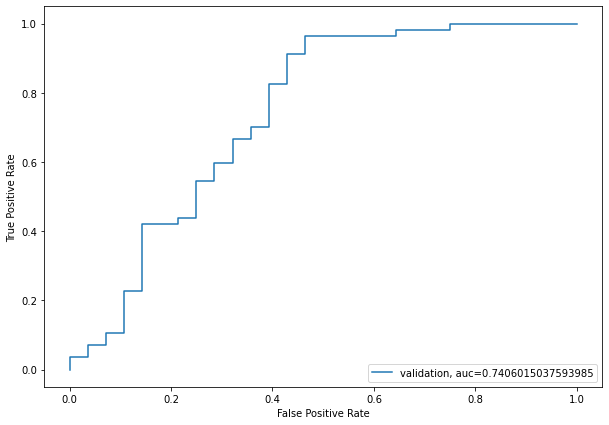

In [14]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Logistic Regression-Removing insignificant variables (Remaining vars - Education, CoapplicantIncome,Loan_Amount_Term, Credit_History)

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Education','CoapplicantIncome','Loan_Amount_Term','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_SigVar = sm.Logit(y_train, X_train).fit()
print(logit_model_SigVar.summary2())

In [ ]:
logit_model_SigVar.pvalues < 0.05

In [ ]:
y_pred_SigVar = logit_model_SigVar.predict(X_test)
y_pred_SigVar

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_SigVar.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

**--> The accuracy did not improve after remmoving the insignificant variables.**

# Logistic Regression without outliers

Since there is noise the data and the data is skewed to the right, we perform below two corrective actions:
1. Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data
2. Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

## Method1: Remove outlier customers with extreme income (above $30000 i.e. 7 customers) - This resulted in better distribution of data

In [ ]:
#Remove outlier customers with outlying ApplicantIncome (above $30000 i.e. 7 customers)
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].count())
#plt.hist(loan['ApplicantIncome'][loan['ApplicantIncome']<30000], bins=10)

#Remove outlier customers with outlying CoaaplicantIncome (above $15000 i.e. 4 customers)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].count())
#plt.hist(loan['CoapplicantIncome'][loan['CoapplicantIncome']<15000], bins=10)

#Remove outlier customers with outlying loan amount (above $500 i.e. 5 customers)
print(loan['LoanAmount'][loan['LoanAmount']>500].count())
#plt.hist(loan['LoanAmount'][loan['LoanAmount']<500], bins=10)

In [ ]:
print(loan['ApplicantIncome'][loan['ApplicantIncome']>30000].index)
print(loan['CoapplicantIncome'][loan['CoapplicantIncome']>15000].index)
print(loan['LoanAmount'][loan['LoanAmount']>500].index)

In [ ]:
#Create dataset without outliers - drop rows 
loan_noOutliers = loan.copy()
loan_noOutliers.drop(loan_noOutliers['ApplicantIncome'][loan_noOutliers['ApplicantIncome']>30000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['CoapplicantIncome'][loan_noOutliers['CoapplicantIncome']>15000].index, inplace=True)
loan_noOutliers.drop(loan_noOutliers['LoanAmount'][loan_noOutliers['LoanAmount']>500].index, inplace=True)

In [ ]:
loan_noOutliers.shape

In [ ]:
## Logistic Regression without outliers and skewness-droppinng outliers (method1)

In [ ]:
#Logistic Regression- Without outliers- method2: using log function
from sklearn .model_selection import train_test_split
X=loan_noOutliers[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']] 
y=loan_noOutliers[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_DropOutliers = sm.Logit(y_train, X_train).fit()
print(logit_model_DropOutliers.summary2())

In [ ]:
logit_model_DropOutliers.pvalues < 0.05

In [ ]:
y_pred_DropOutliers = logit_model_DropOutliers.predict(X_test)
y_pred_DropOutliers

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_DropOutliers.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### Recursive Feature Elimination - without outliers method 1

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=8)
rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

In [ ]:
insignificant_pred = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] > 1]

In [ ]:
for ranking in insignificant_pred:
    insignificant_var = X_train.columns[ranking]
    print(insignificant_var)

In [ ]:
ranking = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] < 2]
ranking

In [ ]:
X_train_final = pd.DataFrame()
for index in ranking:
    col_name=X_train.columns[index]
    X_train_final[col_name]=X_train.iloc[:, index]

In [ ]:
X_train_final.shape, y_train.shape


In [ ]:
X_test_final = X_test.copy()
X_test_final.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train_final).fit()

In [ ]:
y_pred_regression = logit_model.predict(X_test_final)
y_pred_regression

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)


#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### K-fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_train_final.shape

In [ ]:
X_train_final = X_train_final.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test_final = X_test_final.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train_final,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train_final.loc[train_index],X_train_final.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test_final)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression-Removing insignificant variables 

In [ ]:
from sklearn .model_selection import train_test_split
X=loan[['Education','Loan_Amount_Term','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_DropOutliers = sm.Logit(y_train, X_train).fit()
print(logit_model_DropOutliers.summary2())

In [ ]:
logit_model_DropOutliers.pvalues < 0.05

In [ ]:
y_pred_DropOutliers = logit_model_DropOutliers.predict(X_test)
y_pred_DropOutliers

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_DropOutliers.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

# Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

In [ ]:
#Performing normalization using logarithmic function on columns - ApplicantIncome, CoapplicantIncome, LoanAmount. Since we have large number of zeroes in CoApplicantIncome column, we decided to combine ApplicationIncome and CoapplicationIncome as TotalApplicantIncome

loan['TotalApplicantIncome']=loan['ApplicantIncome']+loan['CoapplicantIncome']
loan['TotalApplicantIncome']

# applying log function on TotalApplicantIncome & LoanAmount_log
loan['TotalApplicantIncome_log']=np.log(loan['TotalApplicantIncome'])    
loan['LoanAmount_log']=np.log(loan['LoanAmount'])

In [ ]:
loan.head()

In [ ]:
loan['TotalApplicantIncome_log'].hist(bins=10) 

In [ ]:
loan['LoanAmount_log'].hist(bins=10)

## Logistic Regression without outliers and skewness-log function normalization (method 2)

In [ ]:
loan.columns

In [ ]:
from sklearn .model_selection import train_test_split
#Logistic Regression- Without outliers- method2: using log function
X=loan[['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','TotalApplicantIncome_log', 'LoanAmount_log','Credit_History','Property_Area']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_nOutliers_Log = sm.Logit(y_train, X_train).fit()
print(logit_model_nOutliers_Log.summary2())

In [ ]:
logit_model_nOutliers_Log.pvalues < 0.05

In [ ]:
y_pred_nOutliers_Log = logit_model_nOutliers_Log.predict(X_test)
y_pred_nOutliers_Log

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_nOutliers_Log.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### Recursive Feature Elimination - without outliers method 2

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=8)
rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

In [ ]:
insignificant_pred = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] > 1]

In [ ]:
for ranking in insignificant_pred:
    insignificant_var = X_train.columns[ranking]
    print(insignificant_var)

In [ ]:
ranking = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] < 2]
ranking

In [ ]:
X_train_final = pd.DataFrame()
for index in ranking:
    col_name=X_train.columns[index]
    X_train_final[col_name]=X_train.iloc[:, index]

In [ ]:
X_train_final.shape, y_train.shape

In [ ]:
X_test_final = X_test.copy()
X_test_final.drop(['Gender', 'Loan_Amount_Term'], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model = sm.Logit(y_train, X_train_final).fit()

In [ ]:
y_pred_regression = logit_model.predict(X_test_final)
y_pred_regression

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_regression.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)


#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

### K-fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
X_train_final = X_train_final.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test_final = X_test_final.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X_train_final,y_train):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X_train_final.loc[train_index],X_train_final.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(X_test_final)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## Logistic Regression-Removing insignificant variables 

In [ ]:
X=loan[['Education','Credit_History']] 
y=loan[['Loan_Status']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols
logit_model_nOutliers_Log = sm.Logit(y_train, X_train).fit()
print(logit_model_nOutliers_Log.summary2())

In [ ]:
logit_model_nOutliers_Log.pvalues < 0.05

In [ ]:
y_pred_nOutliers_Log = logit_model_nOutliers_Log.predict(X_test)
y_pred_nOutliers_Log

In [ ]:
#Evaluating model
from sklearn.metrics import confusion_matrix

Loan_Status = []
for index, value in y_pred_nOutliers_Log.items():
    if value < 0.5:
        Loan_Status.append(0)
    else:
        Loan_Status.append(1)
        
#Calculating the confusion matrix and accuracy of the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Loan_Status,y_test)
print("Confusion Matrix: \n", confusion_matrix, "\n")

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(y_test, Loan_Status), "\n")

from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, Loan_Status))

## Variable Correlations-Heatmap

In [ ]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(loan.corr(), vmin=-1, vmax=1, annot=True) 

In [ ]:
loan.corr()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=8)
rfe.fit(X_train, y_train.values.ravel())

print(rfe.support_)
print(rfe.ranking_)

insignificant_pred = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] > 1]

for ranking in insignificant_pred:
    insignificant_var = X_train.columns[ranking]
    print(insignificant_var)
    
ranking = [i for i in range(len(rfe.ranking_)) if rfe.ranking_[i] < 2]
ranking

X_train_final = pd.DataFrame()
for index in ranking:
    col_name=X_train.columns[index]
    X_train_final[col_name]=X_train.iloc[:, index]

    
X_train_final.shape, y_train.shape

X_test_final = X_test.copy()
X_test_final.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis=1, inplace=True)